In [1]:
import sys
sys.path.extend(['/dat/mw/Dev/tvb/scientific_library/'])
from tvb.simulator.lab import *
import time

Setting up a single node simulation with the Epileptor using TVB:

In [2]:
con = connectivity.Connectivity(speed=10000.)
nor = 1
con.motif_all_to_all(number_of_regions=nor)
# definition of epileptogenic zone
epi = models.Epileptor(x0=np.array([-1.6]))
var_names = ['y0', 'y1', 'y2', 'y3', 'y4', 'y5']
var_ranges = np.array([[0., 0.01], [0., 0.01] , [4., 4.01], [0., 0.01], [0., 0.01], [0.01, 0.02]])
epi.state_variable_range = dict(zip(var_names, var_ranges))
#coupling
coupl = coupling.Difference(a=0.)
heunint = integrators.HeunDeterministic(dt=0.05)
my_raw = monitors.Raw()
sim = simulator.Simulator(model=epi, 
                          connectivity=con, 
                          coupling=coupl,
                          integrator=heunint, 
                          monitors=(my_raw, ))
sim.configure()


Simulator(bound=False, value=None)

In [3]:
tic = time.time()
ts, ys = [], []
for i, ((t, y), ) in enumerate(sim(simulation_length=2e3)):
    ts.append(t)
    ys.append(y)
toc = time.time()
ts, ys = array(ts), array(ys)
"%.3f s elapsed" % (toc - tic, )

'21.454 s elapsed'

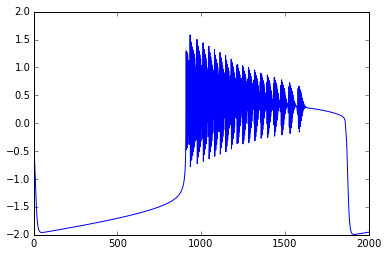

In [5]:
%pylab inline
plot(ts, ys[:, 0, 0, 0])

Now we run the benchmark implementing the same simulation with SDDEKit,

In [7]:
!../bench_hmje1

In the console this prints
```
[DEBUG] src/sd_solv.c:135 (sd_sol_new_default) no delays present.
[DEBUG] src/sd_solv.c:51 (cont) continuation required 0.159 s walltime
```

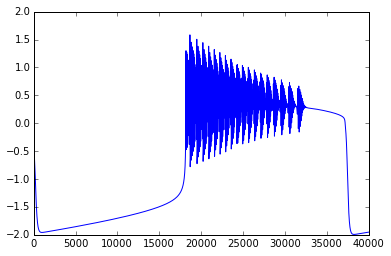

In [8]:
lfp = loadtxt('../hmje-raw.txt')
plot(lfp[:, 2])

Comparing results, we see good agreement

(925, 945)

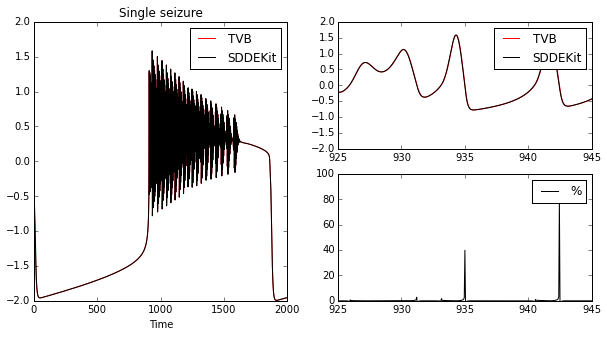

In [81]:
figure(figsize=(10, 5))

subplot(121)
shift = 22
plot(ts[shift:], ys[shift:, 0, 0, 0], 'r')
plot(ts[shift:], lfp[:-shift, 2], 'k')
title('Single seizure')
legend(('TVB', 'SDDEKit'))
xlabel('Time')

subplot(222)
plot(ts[shift:], ys[shift:, 0, 0, 0], 'r')
plot(ts[shift:], lfp[:-shift, 2], 'k')
legend(('TVB', 'SDDEKit'))
tl = r_[925, 945]

xlim(tl)

subplot(224)
plot(ts[shift:], (ys[shift:, 0, 0, 0] - lfp[:-shift, 2])**2/ys[shift:, 0, 0, 0]*100, 'k')
legend(('% error'))
ylim([0, 100])
xlim(tl)


In this benchmark of a single system, the new implementation is significantly (>100x) faster.